In [1]:
from cgeniepy.ecology import EcoModel
import matplotlib.pyplot as plt    
from cgeniepy.plot import CommunityPalette
import cartopy.crs as ccrs
import numpy as np

ctrl = EcoModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.worlg4.BASESFeTDTL.SPIN",gemflag = ['biogem','ecogem'])
fast = EcoModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.worlg4.BASESFeTDTL.2100.4deg",gemflag = ['biogem','ecogem'])
medium = EcoModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.worlg4.BASESFeTDTL.3000.4deg", gemflag = ['biogem','ecogem'])
slow = EcoModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.worlg4.BASESFeTDTL.4000.4deg",gemflag = ['biogem','ecogem'])
slowest = EcoModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.worlg4.BASESFeTDTL.5000.4deg",gemflag = ['biogem','ecogem'])
spinup = EcoModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.worlg4.BASESFeTDTL.2.5xCO2.SPIN",gemflag = ['biogem','ecogem'])

def glob_int_biomass(model, pft):
    """
    integrated foraminifera biomass for one foram ecogroup
    and one model instance
    """

    ## m3 in the first layer
    grid_volume = model.grid_volume().isel(zt=0, time=-1)
    ## mmol C m-3
    foram_biomass = model.get_pft(pft).sum(dim='variable')

    global_biomass = foram_biomass * grid_volume ## mmol C
    ## convert to Pg C
    global_biomass = global_biomass * 12 * 1E-3 * 1E-15

    return global_biomass.sum(dim=['lat','lon'])

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
fast_biomass = glob_int_biomass(fast, [16,17,18,19])
medium_biomass = glob_int_biomass(medium, [16,17,18,19])
slow_biomass = glob_int_biomass(slow, [16,17,18,19])
slowest_biomass = glob_int_biomass(slowest, [16,17,18,19])
spinup_biomass = glob_int_biomass(spinup, [16,17,18,19]).isel(time=-1)

grid area returned in the unit of 'm2'
grid volume calculated in the unit of 'm3'
grid area returned in the unit of 'm2'
grid volume calculated in the unit of 'm3'
grid area returned in the unit of 'm2'
grid volume calculated in the unit of 'm3'
grid area returned in the unit of 'm2'
grid volume calculated in the unit of 'm3'
grid area returned in the unit of 'm2'
grid volume calculated in the unit of 'm3'


In [3]:
# Force Matplotlib to use Helvetica
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams['font.size'] = 7

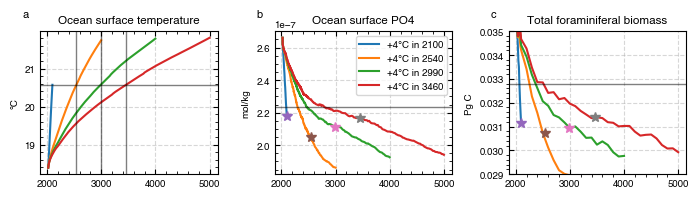

In [10]:
from tkinter import font
from matplotlib.font_manager import FontProperties


fig, axs = plt.subplots(1, 3, figsize=(7, 2), sharex=True, tight_layout=True)
ax = axs.flatten()
fast.get_ts("ocn_temp", to_ScatterData=True).plot(var='_surT (C)', kind='line', ax=ax[0], label='+4°C in 2100')
medium.get_ts("ocn_temp", to_ScatterData=True).plot(var='_surT (C)', kind='line', ax=ax[0], label='+4°C in 2540')
slow.get_ts("ocn_temp", to_ScatterData=True).plot(var='_surT (C)', kind='line', ax=ax[0], label='+4°C in 2990')
slowest.get_ts("ocn_temp", to_ScatterData=True).plot(var='_surT (C)', kind='line', ax=ax[0], label='+4°C in 3460')

##set font Helvetica and 7pt
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 7

## get the year when the slow model reaches 2100's warming level at the fast model
ref_temp = fast.get_ts("ocn_temp", to_ScatterData=True).data.loc[2099.5]['_surT (C)']

## find the closest year in the slow model
medium_temp = medium.get_ts("ocn_temp", to_ScatterData=True).reset_index()
medium_temp['diff'] = abs(medium_temp['_surT (C)'] - ref_temp)
medium_year = medium_temp.loc[medium_temp['diff'].idxmin()]['time (yr)']

slow_temp = slow.get_ts("ocn_temp", to_ScatterData=True).reset_index()
slow_temp['diff'] = abs(slow_temp['_surT (C)'] - ref_temp)
slow_year = slow_temp.loc[slow_temp['diff'].idxmin()]['time (yr)']

slowest_temp = slowest.get_ts("ocn_temp", to_ScatterData=True).reset_index()
slowest_temp['diff'] = abs(slowest_temp['_surT (C)'] - ref_temp)
slowest_year = slowest_temp.loc[slowest_temp['diff'].idxmin()]['time (yr)']

## set a horizontal line at y=2100, fast
ax[0].axhline(y=ref_temp, color='k', linestyle='-', linewidth=1, alpha=0.5)

## set a vertical line at x=year
ax[0].axvline(x=medium_year, color='k', linestyle='-', linewidth=1, alpha=0.5)
ax[0].axvline(x=slow_year, color='k', linestyle='-', linewidth=1, alpha=0.5)
ax[0].axvline(x=slowest_year, color='k', linestyle='-', linewidth=1, alpha=0.5)

#-------plot the PO4--------------
fast.get_ts("ocn_po4", to_ScatterData=True).plot(var='surface PO4 (mol kg-1)', kind='line', ax=ax[1], label='+4°C in 2100')
medium.get_ts("ocn_po4", to_ScatterData=True).plot(var='surface PO4 (mol kg-1)', kind='line', ax=ax[1], label='+4°C in 2540')
slow.get_ts("ocn_po4", to_ScatterData=True).plot(var='surface PO4 (mol kg-1)', kind='line', ax=ax[1], label='+4°C in 2990')
slowest.get_ts("ocn_po4", to_ScatterData=True).plot(var='surface PO4 (mol kg-1)', kind='line', ax=ax[1], label='+4°C in 3460')

## set a horizontal line at y=2100
ref_po4 = fast.get_ts("ocn_po4", to_ScatterData=True).data.loc[2099.5]['surface PO4 (mol kg-1)']
medium_po4 = medium.get_ts("ocn_po4", to_ScatterData=True).data.loc[medium_year]['surface PO4 (mol kg-1)']
slow_po4 = slow.get_ts("ocn_po4", to_ScatterData=True).data.loc[slow_year]['surface PO4 (mol kg-1)']
slowest_po4 = slowest.get_ts("ocn_po4", to_ScatterData=True).data.loc[slowest_year]['surface PO4 (mol kg-1)']
spinup_po4 = spinup.get_ts("ocn_po4", to_ScatterData=True).data.iloc[-1]['surface PO4 (mol kg-1)']

## show slow po4 in star
ax[1].plot(2100, ref_po4, '*', markersize=7)
ax[1].plot(medium_year, medium_po4, '*', markersize=7)
ax[1].plot(slow_year, slow_po4, '*', markersize=7)
ax[1].plot(slowest_year, slowest_po4, '*', markersize=7)
## add a line for spinup po4
ax[1].axhline(y=spinup_po4, color='k', linestyle='-', linewidth=1, alpha=0.5)

ax[0].set_title('Ocean surface temperature')
ax[1].set_title('Ocean surface PO4')
ax[2].set_title('Total foraminiferal biomass')

## set y label
ax[0].set_ylabel('°C', fontsize=7, font='Helvetica')
ax[1].set_ylabel('mol/kg', fontsize=7,font='Helvetica')
ax[2].set_ylabel('Pg C', fontsize=7,font='Helvetica')

ax[1].legend()


ax[2].plot(fast_biomass['time'], fast_biomass.data, label='fast')
ax[2].plot(medium_biomass['time'], medium_biomass.data, label='medium')
ax[2].plot(slow_biomass['time'], slow_biomass.data, label='slow')
ax[2].plot(slowest_biomass['time'], slowest_biomass.data, label='slowest')
ax[2].set_ylim(0.029, 0.035)

medium_point = medium_biomass.sel(time=medium_year, method='nearest')
slow_point = slow_biomass.sel(time=slow_year, method='nearest')
slowest_point = slowest_biomass.sel(time=slowest_year, method='nearest')

ax[2].axhline(y=spinup_biomass.data, color='k', linestyle='-', linewidth=1, alpha=0.5)
ax[2].plot(2100, fast_biomass.isel(time=-1), '*', markersize=7)
ax[2].plot(medium_year, medium_point, '*', markersize=7)
ax[2].plot(slow_year, slow_point, '*', markersize=7)
ax[2].plot(slowest_year, slowest_point, '*', markersize=7)

## lettering each panel
ax[0].text(-0.1, 1.1, 'a', transform=ax[0].transAxes, fontsize=8, font='Helvetica', fontweight='bold')
ax[1].text(-0.1, 1.1, 'b', transform=ax[1].transAxes, fontsize=8, font='Helvetica', fontweight='bold')
ax[2].text(-0.1, 1.1, 'c', transform=ax[2].transAxes, fontsize=8, font='Helvetica', fontweight='bold')

## add the same grid
ax[2].grid(True, linestyle='--', alpha=0.5)
ax[2].tick_params(axis='both', direction='in')
ax[2].minorticks_on()

plt.savefig("/Users/yingrui/Downloads/supp_fig8.png", dpi=300)

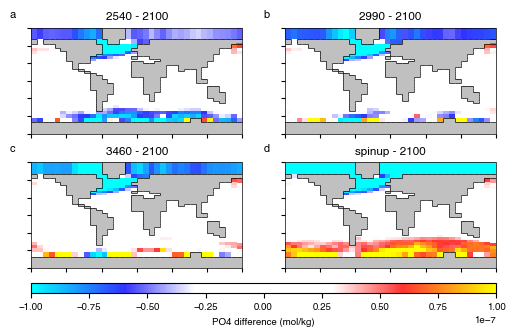

In [17]:
fast_po42d = fast.get_var("ocn_sur_PO4").sel(time=2100, method='nearest')
medium_po42d = medium.get_var("ocn_sur_PO4").sel(time=medium_year, method='nearest')
slowest_po42d = slowest.get_var("ocn_sur_PO4").sel(time=slowest_year, method='nearest')
slow_po42d = slow.get_var("ocn_sur_PO4").sel(time=slow_year, method='nearest')
spinup_po42d = spinup.get_var("ocn_sur_PO4").isel(time=-1)
ctrl_po42d = ctrl.get_var("ocn_sur_PO4").isel(time=-1)

import cartopy.crs as ccrs
fig, axs = plt.subplots(2,2, figsize=(6, 4), subplot_kw={'projection': ccrs.PlateCarree()})

for i, model_po42d in enumerate([medium_po42d, slow_po42d, slowest_po42d, spinup_po42d]):
    diff = (model_po42d - fast_po42d).to_GriddedDataVis()
    diff.aes_dict['pcolormesh_kwargs'] = {'cmap': CommunityPalette('white_centered').colormap, 'vmin': -1E-7, 'vmax': 1E-7}
    p = diff.plot(ax=axs.flatten()[i], colorbar=False, gridline=True, outline=True)
## add colorbar
cbar = fig.colorbar(p, ax=axs, orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('PO4 difference (mol/kg)', fontsize=7, font='Helvetica')

## add title
axs[0,0].set_title('2540 - 2100')
axs[0,1].set_title('2990 - 2100')
axs[1,0].set_title('3460 - 2100')    
axs[1,1].set_title('spinup - 2100')

## lettering each panel
axs[0,0].text(-0.1, 1.1, 'a', transform=axs[0,0].transAxes, fontsize=8, font='Helvetica', fontweight='bold')
axs[0,1].text(-0.1, 1.1, 'b', transform=axs[0,1].transAxes, fontsize=8, font='Helvetica', fontweight='bold')
axs[1,0].text(-0.1, 1.1, 'c', transform=axs[1,0].transAxes, fontsize=8, font='Helvetica', fontweight='bold')
axs[1,1].text(-0.1, 1.1, 'd', transform=axs[1,1].transAxes, fontsize=8, font='Helvetica', fontweight='bold')

plt.savefig("/Users/yingrui/Downloads/supp_fig9.png", dpi=300, bbox_inches='tight')

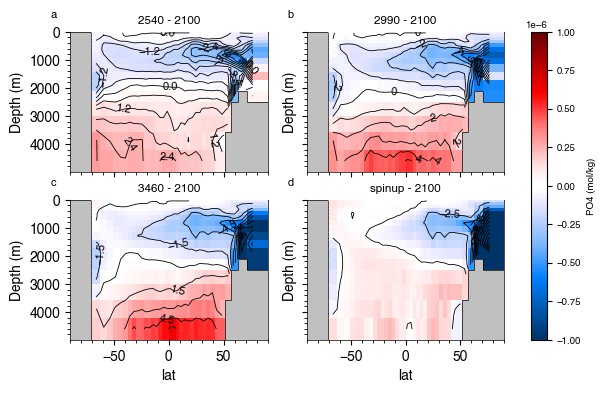

In [21]:
fig, axs = plt.subplots(2,2, figsize=(7, 4), sharex=True, sharey=True)
ncmoc_var = 'ocn_PO4'
ctrl_amoc = ctrl.get_var(ncmoc_var).isel(time=-1).mean(dim='lon')
fast_amoc = fast.get_var(ncmoc_var).isel(time=-1).mean(dim='lon')
medium_amoc = medium.get_var(ncmoc_var).sel(time=2500, method='nearest').mean(dim='lon')
slow_amoc = slow.get_var(ncmoc_var).sel(time=slow_year, method='nearest').mean(dim='lon')
slowest_amoc = slowest.get_var(ncmoc_var).sel(time=slowest_year, method='nearest').mean(dim='lon')
spinup_amoc = spinup.get_var(ncmoc_var).isel(time=-1).mean(dim='lon')

for i,j in enumerate([medium_amoc, slow_amoc, slowest_amoc, spinup_amoc]):
    diff = j-fast_amoc
    diff_plotter = diff.to_GriddedDataVis()
    diff_plotter.aes_dict['pcolormesh_kwargs'] = {'cmap': CommunityPalette('red_blue_centered_r').colormap, 'vmin': -1E-6, 'vmax': 1E-6}
    p = diff_plotter.plot(outline=True,contour=True, ax=axs.flatten()[i], colorbar=False)
    axs.flatten()[i].set_ylabel('Depth (m)')

fig.colorbar(p, ax=axs, orientation='vertical', label='PO4 (mol/kg)')
axs[0,0].set_title('2540 - 2100')
axs[0,1].set_title('2990 - 2100')
axs[1,0].set_title('3460 - 2100')
axs[1,1].set_title('spinup - 2100')
axs[0,0].invert_yaxis()
axs[0,0].set_xlabel("")
axs[0,1].set_xlabel("")

## lettering each panel
axs[0,0].text(-0.1, 1.1, 'a', transform=axs[0,0].transAxes, fontsize=8, font='Helvetica', fontweight='bold')
axs[0,1].text(-0.1, 1.1, 'b', transform=axs[0,1].transAxes, fontsize=8, font='Helvetica', fontweight='bold')
axs[1,0].text(-0.1, 1.1, 'c', transform=axs[1,0].transAxes, fontsize=8, font='Helvetica', fontweight='bold')
axs[1,1].text(-0.1, 1.1, 'd', transform=axs[1,1].transAxes, fontsize=8, font='Helvetica', fontweight='bold')


plt.savefig("/Users/yingrui/Downloads/supp_fig10.png", dpi=300, bbox_inches='tight')